## Entrenamiento del modelo

En esta notebook se entrena el modelo de juguete para utilizar el agente. Es un modelo simple, con un data set aleatorio, cuyo objetivo es integrar la generación del input por parte del agente. 
Puede ser reemplazado por modelos más complejos

In [1]:
# Paso 1: Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import joblib

c:\Proyectos\ds_agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
# Paso 2: Crear un conjunto de datos ficticio
np.random.seed(42)
# Generar fechas
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generar datos de temperatura
temperature = np.random.normal(loc=25, scale=5, size=100)

# Generar datos de ventas ficticias
sales = np.random.randint(75, 125, size=100)

# Crear DataFrame
df = pd.DataFrame({'ds': dates, 'y': sales, 'temperature': temperature})

df.head()

,ds,y,temperature
0,2020-01-01,83,27.483571
1,2020-01-02,111,24.308678
2,2020-01-03,107,28.238443
3,2020-01-04,116,32.615149
4,2020-01-05,118,23.829233


In [8]:
# Paso 3: Ajustar el modelo Prophet
model = Prophet()
model.add_regressor('temperature')  # Agregar la variable temperatura como regresor
model.fit(df)

19:49:19 - cmdstanpy - INFO - Chain [1] start processing
19:49:19 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Paso 4: Hacer predicciones en el conjunto original para calcular el error
future = df[['ds', 'temperature']]
forecast = model.predict(future)

# Calcular MAE
mae = mean_absolute_error(df['y'], forecast['yhat'])
print(f"MAE (Error absoluto medio): {mae:.2f}")

MAE (Error absoluto medio): 12.94


In [10]:
# Paso 5: Hacer predicciones futuras
future_dates = model.make_future_dataframe(periods=10)  # Predicciones para 10 días
future_dates['temperature'] = np.random.normal(loc=25, scale=5, size=len(future_dates))  # Temperatura para predicciones

forecast = model.predict(future_dates)

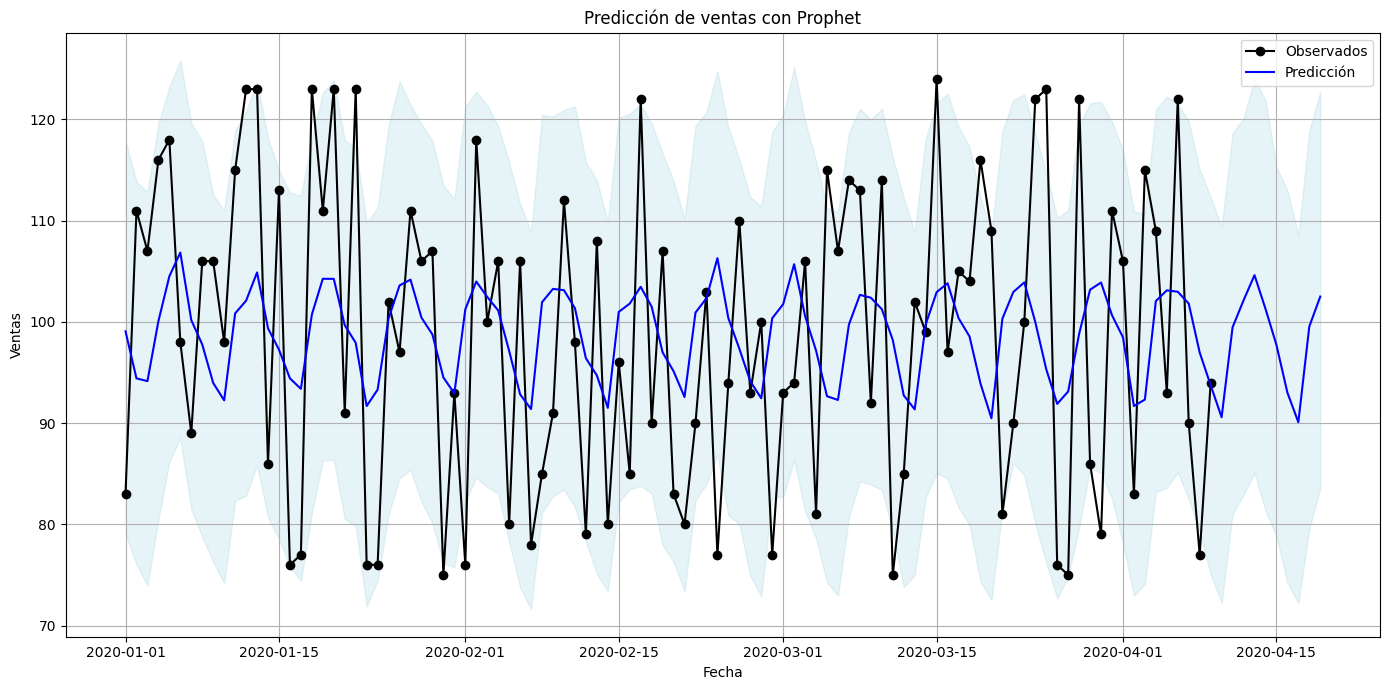

In [11]:
# Paso 6: Visualizar los resultados
fig, ax = plt.subplots(figsize=(14, 7))

# Graficar datos observados
ax.plot(df['ds'], df['y'], 'ko-', label='Observados')

# Graficar predicciones
ax.plot(forecast['ds'], forecast['yhat'], color='blue', ls='-', label='Predicción')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.3)

# Configuración de la gráfica
ax.set_title('Predicción de ventas con Prophet')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Paso 7: Guardar el modelo
joblib.dump(model, '../model/modelo_prophet.pkl')
print("Modelo guardado como 'modelo_prophet.pkl'")

Modelo guardado como 'modelo_prophet.pkl'
